### Dataset URL : https://www.kaggle.com/nsharan/h-1b-visa

## Write Code in Empty cells don't use existing cells otherwise output will be earesed use new cells to write code

#### Import Related Libraries

In [337]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

download data set from this link

[h1b.csv](https://drive.google.com/file/d/1GHotByxQaCXKPAuNI7dqIMiOMdmnkOzN/view?usp=sharing)

### read csv in Pandas DataFrame 

In [338]:
df = pd.read_csv('h1b_kaggle.csv')

In [339]:
df.head(3)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158


### show columns

In [5]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

### delete 'unnamed:0'  column from data set

In [340]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

## check no of rows in data frame

In [7]:
len(df)

3002458

## Drop All rows which has any NA value and show first 5 rows after this operation

In [341]:
df.dropna(inplace=True)
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


## reset index and check how many rows you have 

In [342]:
df.reset_index(inplace=True,drop=True)
len(df)

2877765

## Write a code to find out top 15 hiring company (Employer Name) 

In [10]:
op = df['EMPLOYER_NAME'].value_counts()
op.head()

INFOSYS LIMITED                      130257
TATA CONSULTANCY SERVICES LIMITED     64273
WIPRO LIMITED                         45673
DELOITTE CONSULTING LLP               35999
IBM INDIA PRIVATE LIMITED             33585
Name: EMPLOYER_NAME, dtype: int64

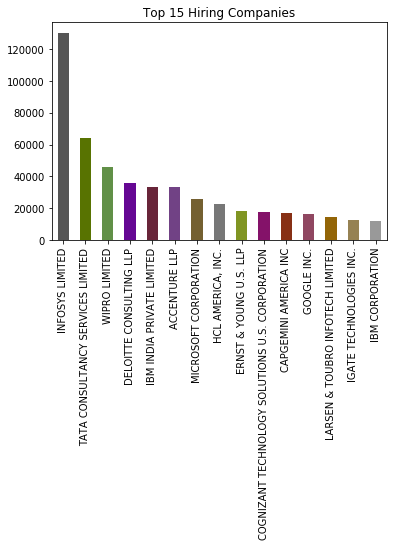

In [11]:
colors = ['#'+str(int(i)) for i in np.linspace(555555,999999,15)]
op.head(15).plot(kind='bar',title='Top 15 Hiring Companies',color=colors)

### Top 15 companies which provide highest PREVALING WAGE

In [404]:
'BAALAAJEE INC' in df['EMPLOYER_NAME'].unique().tolist()

False

##### Average PREVAILING WAGE

In [13]:
op = df['PREVAILING_WAGE'].mean()
op

145166.64888402403

### Top 20 WORKSITE 

In [ ]:
op = df.groupby('WORKSITE').size()
op = op.sort_values(ascending=False)
print(op.head(20))

In [ ]:
colors = ['#'+str(int(i)) for i in np.linspace(999999,111111,15)]
op.head(15).plot(kind='bar',title='Top 15 Worksites',color=colors)

### head of Worksite Column

In [ ]:
df['WORKSITE'].head()

### Show Column Names

### Apply a Function on DataFrame to gather only State Name from Worksite

    eg. worksite name current -  SAN FRANCISCO, CALIFORNIA
        worksite name after - CALIFORNIA
        
**note**: there sholud not be any space at the begning or end of worksite name

In [296]:
df['WORKSITE'] = pd.Series([i.split(',')[1][1:] for i in df['WORKSITE']])
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003


**note:** if you view your analysis than you will find that 'MARIANA ISLANDS' worksite name is replaced with NA values

### Replace all NA records in your Worksite Column with Value  'MARIANA ISLANDS' 


In [298]:
df['WORKSITE'].fillna('MARIANA ISLANDS')

0               MICHIGAN
1                  TEXAS
2             NEW JERSEY
3               COLORADO
4               MISSOURI
               ...      
2877760       CALIFORNIA
2877761             UTAH
2877762             OHIO
2877763    MASSACHUSETTS
2877764    MASSACHUSETTS
Name: WORKSITE, Length: 2877765, dtype: object

### Print out how many unique Worksites are there

In [299]:
print('Unique Worksites : ' + str(len(df['WORKSITE'].unique())))
df['WORKSITE'].unique()

Unique Worksites : 53


array(['MICHIGAN', 'TEXAS', 'NEW JERSEY', 'COLORADO', 'MISSOURI',
       'FLORIDA', 'CALIFORNIA', 'VIRGINIA', 'PENNSYLVANIA', 'WISCONSIN',
       'ILLINOIS', 'DISTRICT OF COLUMBIA', 'NORTH CAROLINA',
       'RHODE ISLAND', 'OHIO', 'WASHINGTON', 'GEORGIA', 'NEW YORK',
       'INDIANA', 'MARYLAND', 'MASSACHUSETTS', 'NEVADA', 'NEW HAMPSHIRE',
       'LOUISIANA', 'MINNESOTA', 'SOUTH CAROLINA', 'ARIZONA', 'TENNESSEE',
       'HAWAII', 'UTAH', 'DELAWARE', 'NA', 'KANSAS', 'CONNECTICUT',
       'MAINE', 'OKLAHOMA', 'ARKANSAS', 'PUERTO RICO', 'ALASKA', 'IOWA',
       'OREGON', 'KENTUCKY', 'NEBRASKA', 'NEW MEXICO', 'WEST VIRGINIA',
       'SOUTH DAKOTA', 'NORTH DAKOTA', 'MISSISSIPPI', 'ALABAMA',
       'VERMONT', 'IDAHO', 'WYOMING', 'MONTANA'], dtype=object)

##### show column names 

In [ ]:
df.columns

#### Rename you column names as

    {'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATE','lon':'LON','lat':'LAT'}

In [300]:
df.rename(columns={'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATE','lon':'LON','lat':'LAT'},inplace=True)
df.head(3)

,CASE_STATUS,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATE,LON,LAT
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158


#### Now Remove all Columns Except these columns 

    'CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"

In [301]:
#df.filter(['CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"])
df = df[['CASE_STATUS','YEAR','STATE','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON',"LAT"]]
df.head(3)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016.0,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,UNIVERSITY OF MICHIGAN,-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,2016.0,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,"GOODMAN NETWORKS, INC.",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,2016.0,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,"PORTS AMERICA GROUP, INC.",-74.077642,40.728158


__show colnames__

In [ ]:
df.columns

#### Perform These Operations 

    Precise LON and LAT columns upto 2 decimal palaces
    
    Convert YEAR Column into String
    
    Convert PREV_WAGE column into Integer

In [302]:
df['LON']=np.round(df['LON'],2)
df['LAT']=np.round(df['LAT'],2)
df['YEAR']=df['YEAR'].astype(int)
df['YEAR']=df['YEAR'].astype(str)
df['PREV_WAGE']=df['PREV_WAGE'].astype(int)

__show top 3 values to check above operations__

In [303]:
df.head(3)

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,CERTIFIED-WITHDRAWN,2016,MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,UNIVERSITY OF MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,2016,TEXAS,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,"GOODMAN NETWORKS, INC.",-96.70,33.02
2,CERTIFIED-WITHDRAWN,2016,NEW JERSEY,CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,"PORTS AMERICA GROUP, INC.",-74.08,40.73


### __show unique values of CASE_STATUS Column__

In [304]:
unique = df['CASE_STATUS'].unique()
unique

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

# Calculate the petitions distributions by status

In [120]:
#df['CASE_STATUS'].value_counts()
tot_petitions=[len(df[df['CASE_STATUS']==i]) for i in unique]
tot_petitions

[195721, 84752, 2512114, 85161, 1, 1, 15]

In [24]:
from matplotlib.pyplot import pie,axis,show
import matplotlib as mpl

#### PETITIONS BY CASE STATUS

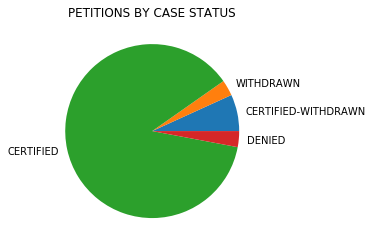

In [25]:
petitions = pd.Series(tot_petitions[0:len(tot_petitions)-3],index=unique[0:len(unique)-3])
petitions.plot(kind='pie',title='PETITIONS BY CASE STATUS',label="")
plt.show()
#petitions

# Calculating the petitions distributions by year

In [13]:
df['YEAR'].value_counts(ascending=True).values.tolist()

[333625, 394267, 422427, 498027, 600120, 629299]

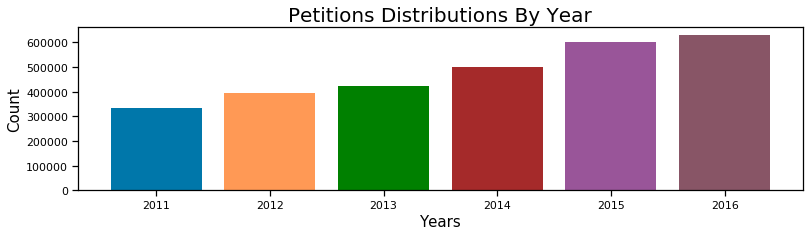

In [133]:
var = df['YEAR'].value_counts(ascending=True)
plt.figure(figsize=(13,3))
plt.bar(height=var.values,x=var.keys(),color=['#0077aa','#ff9955','g','brown','#995599','#885566'])
plt.title('Petitions Distributions By Year',size=20)
plt.ylabel('Count',size=15)
plt.xlabel('Years',size=15)
plt.show()

In [116]:
import seaborn as sn

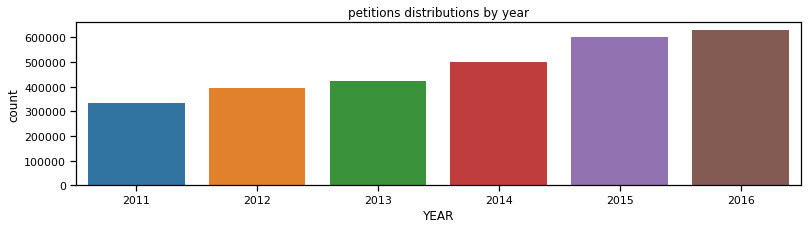

In [118]:
sn.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,3))
plt.title('petitions distributions by year')
sn.countplot(df['YEAR'])

In [36]:
denied = f[f.CASE_STATUS == 'DENIED']
len(denied)

85161

In [37]:
del denied['CASE_STATUS']

In [38]:
denied = denied.reset_index()
denied.head(3)

,index,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
0,39,2016,WASHINGTON,CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200,"PARALLELS, INC.",-122.22,47.48
1,47,2016,CALIFORNIA,CHIEF EXECUTIVES,PRESIDENT,Y,197683,RANCHO LA PUERTA LLC,-117.16,32.72
2,95,2016,ILLINOIS,CHIEF EXECUTIVES,PRINCIPAL (ATTORNEY) AND CHAIRMAN OF THE EXECU...,Y,226699,BAKER & MCKENZIE PC,-87.63,41.88


In [39]:
denied_year_count = [0]* 6

In [40]:
for i in range(0,6):
    denied_year_count[i] = denied[denied.YEAR == years[i]]['YEAR'].count()

In [41]:
denied_year_count

[25986, 18866, 10976, 10816, 10037, 8480]

### Denied PETITIONS DISTRIBUTION BY YEAR

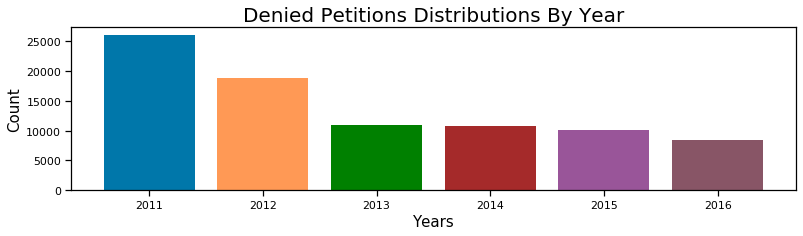

In [135]:
op = df[df['CASE_STATUS']=='DENIED']
var = op['YEAR'].value_counts()
plt.figure(figsize=(13,3))
plt.bar(height=var.values,x=var.keys(),color=['#0077aa','#ff9955','g','brown','#995599','#885566'])
plt.title('Denied Petitions Distributions By Year',size=20)
plt.ylabel('Count',size=15)
plt.xlabel('Years',size=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


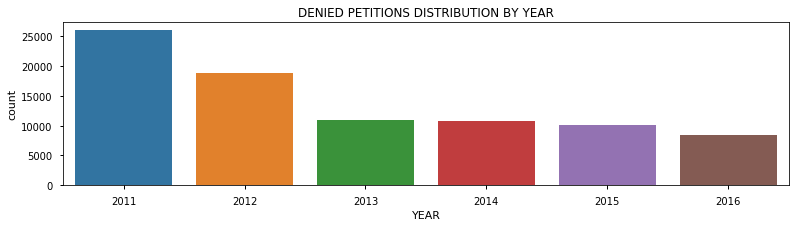

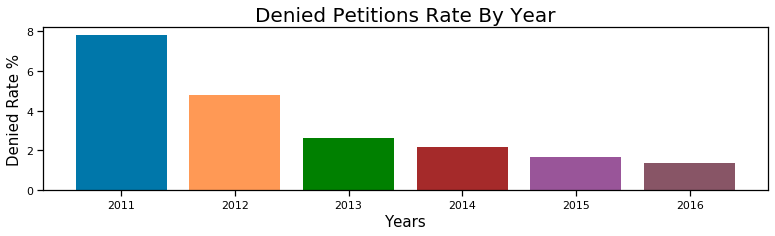

In [155]:
tot = df['YEAR'].value_counts(ascending=True)
op = df[df['CASE_STATUS']=='DENIED']
den = op['YEAR'].value_counts()
op = (den.values/tot.values)*100
years = tot.keys()
plt.figure(figsize=(13,3))
plt.bar(height=op,x=years,color=['#0077aa','#ff9955','g','brown','#995599','#885566'])
plt.title('Denied Petitions Rate By Year',size=20)
plt.ylabel('Denied Rate %',size=15)
plt.xlabel('Years',size=15)
plt.show()

#### Denied % Rate By Year

year,2011,2012,2013,2014,2015,2016
denied rate %,7.79,4.79,2.6,2.17,1.67,1.35


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


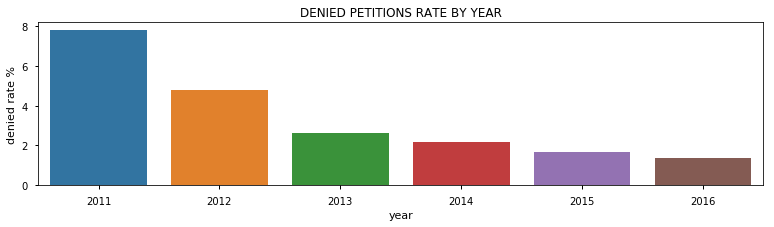

## Calculate the number of petitions filed by the States

In [156]:
df.columns

Index(['CASE_STATUS', 'YEAR', 'STATE', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

Index(['CASE_STATUS', 'YEAR', 'STATE', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

**unique stats sorted**

In [246]:
tot = df['STATE'].value_counts().sort_index()
tot.keys().tolist()

[' ALABAMA',
 ' ALASKA',
 ' ARIZONA',
 ' ARKANSAS',
 ' CALIFORNIA',
 ' COLORADO',
 ' CONNECTICUT',
 ' DELAWARE',
 ' DISTRICT OF COLUMBIA',
 ' FLORIDA',
 ' GEORGIA',
 ' HAWAII',
 ' IDAHO',
 ' ILLINOIS',
 ' INDIANA',
 ' IOWA',
 ' KANSAS',
 ' KENTUCKY',
 ' LOUISIANA',
 ' MAINE',
 ' MARYLAND',
 ' MASSACHUSETTS',
 ' MICHIGAN',
 ' MINNESOTA',
 ' MISSISSIPPI',
 ' MISSOURI',
 ' MONTANA',
 ' NA',
 ' NEBRASKA',
 ' NEVADA',
 ' NEW HAMPSHIRE',
 ' NEW JERSEY',
 ' NEW MEXICO',
 ' NEW YORK',
 ' NORTH CAROLINA',
 ' NORTH DAKOTA',
 ' OHIO',
 ' OKLAHOMA',
 ' OREGON',
 ' PENNSYLVANIA',
 ' PUERTO RICO',
 ' RHODE ISLAND',
 ' SOUTH CAROLINA',
 ' SOUTH DAKOTA',
 ' TENNESSEE',
 ' TEXAS',
 ' UTAH',
 ' VERMONT',
 ' VIRGINIA',
 ' WASHINGTON',
 ' WEST VIRGINIA',
 ' WISCONSIN',
 ' WYOMING']

['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARIANA ISLANDS', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING']


In [176]:
len(df['STATE'].unique())

53

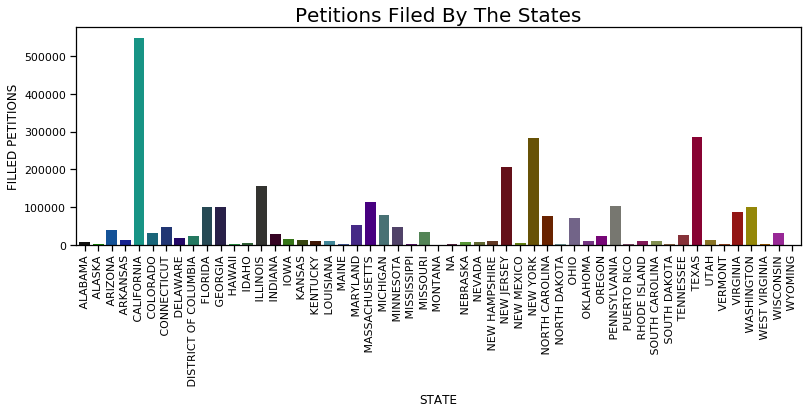

In [247]:
tot.plot(kind='bar',figsize=(13,4),width=0.8,color=[ '#'+str(int(i)) for i in np.linspace(111110,999990,53)])
plt.title('Petitions Filed By The States',size=20)
plt.xlabel('STATE')
plt.ylabel('FILLED PETITIONS')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


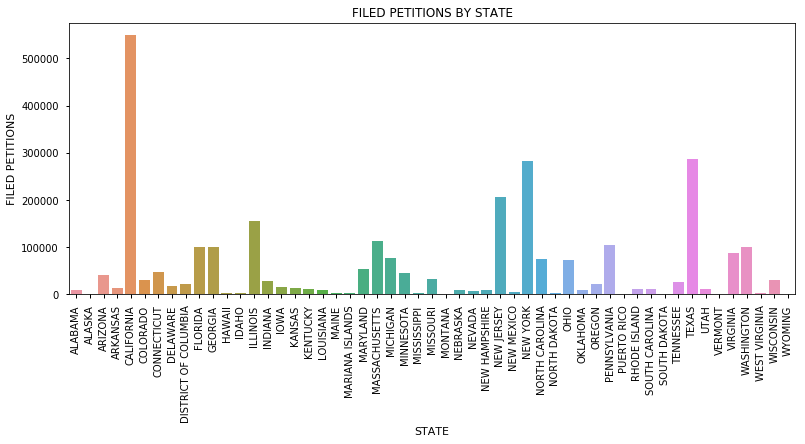

# Number of petitions denied by the state

__total denied petitions__

85161


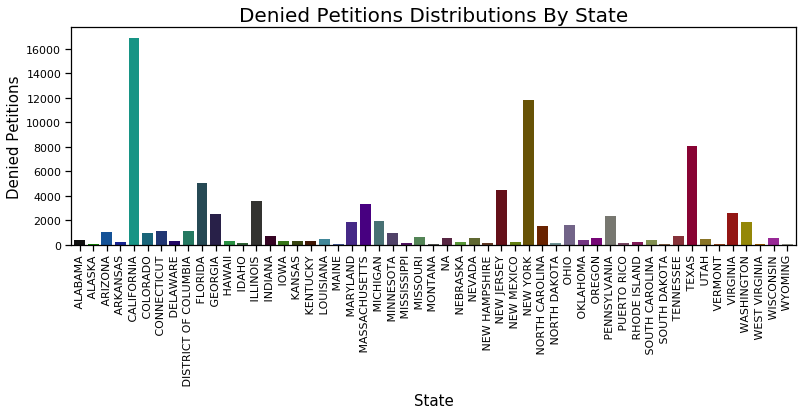

In [244]:
op = df[df['CASE_STATUS']=='DENIED']
den = op['STATE'].value_counts().sort_index()
den.plot(kind='bar',figsize=(13,4),width=0.8,color=[ '#'+str(int(i)) for i in np.linspace(111110,999990,53)])
plt.title('Denied Petitions Distributions By State',size=20)
plt.ylabel('Denied Petitions',size=15)
plt.xlabel('State',size=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


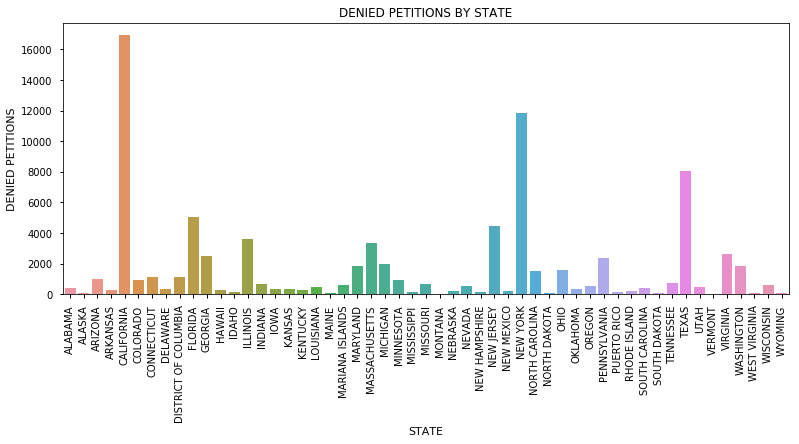

## % Rate of Denied Petitions by State 

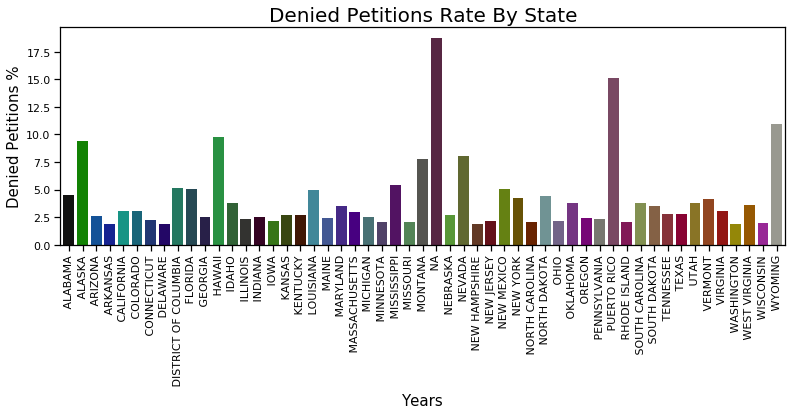

In [258]:
rate = ((den.values/tot.values)*100).round(2)
states = tot.keys()
data = pd.Series(rate,index=states)
plt.figure(figsize=(13,3))
data.plot(kind='bar',figsize=(13,4),width=0.8,color=[ '#'+str(int(i)) for i in np.linspace(111110,999990,53)])
plt.title('Denied Petitions Rate By State',size=20)
plt.ylabel('Denied Petitions %',size=15)
plt.xlabel('Years',size=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


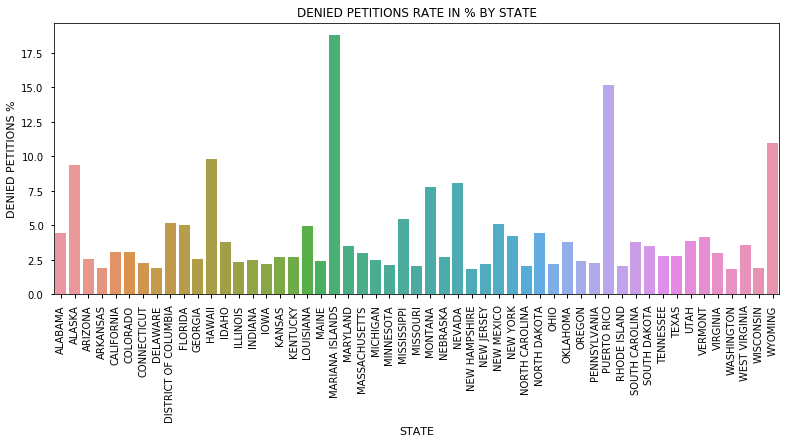

#### Find out how many applied for Illinois State and how many how them are Denied 

In [317]:
ill = df[df['STATE']=='ILLINOIS']
len(ill)

154843

In [319]:
den = ill[ill['CASE_STATUS']=='DENIED']
len(den)

3612

#### How Many People are Certified for Job title 'CHIEF PROCESS OFFICER'  who applied for state  Illinois 

In [320]:
job_title = ill[ill['JOB_TITLE']=='CHIEF PROCESS OFFICER']
len(job_title)

2

2 petitions for the job of "CHIEF PROCESS OFFICER" in the state of illinois were certified


In [321]:
job_title

,CASE_STATUS,YEAR,STATE,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER,LON,LAT
1256937,CERTIFIED,2014,ILLINOIS,Management Analysts,CHIEF PROCESS OFFICER,Y,67080,LITTLER MENDELSON P.C.,-87.63,41.88
1272268,CERTIFIED,2014,ILLINOIS,Management Analysts,CHIEF PROCESS OFFICER,Y,67080,LITTLER MENDELSON P.C.,-87.63,41.88


,index,CASE_STATUS,YEAR,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,EMPLOYER
67488,1295151,CERTIFIED,2014,Management Analysts,CHIEF PROCESS OFFICER,Y,67080,LITTLER MENDELSON P.C.
68437,1311111,CERTIFIED,2014,Management Analysts,CHIEF PROCESS OFFICER,Y,67080,LITTLER MENDELSON P.C.


# Top 25 Job Titles

In [324]:
top_job_titles = df['JOB_TITLE'].value_counts().head(25)
top_job_titles

PROGRAMMER ANALYST             243357
SOFTWARE ENGINEER              118897
COMPUTER PROGRAMMER             68696
SYSTEMS ANALYST                 60754
SOFTWARE DEVELOPER              41875
BUSINESS ANALYST                38781
COMPUTER SYSTEMS ANALYST        34036
TECHNOLOGY LEAD - US            28307
SENIOR SOFTWARE ENGINEER        26617
TECHNOLOGY ANALYST - US         26010
ASSISTANT PROFESSOR             24436
SENIOR CONSULTANT               24120
CONSULTANT                      22643
PROJECT MANAGER                 19015
DATABASE ADMINISTRATOR          16108
PHYSICAL THERAPIST              14203
RESEARCH ASSOCIATE              13409
COMPUTER PROGRAMMER ANALYST     13116
ACCOUNTANT                      12934
DEVELOPER                       12737
ASSOCIATE                       12447
ANALYST                         11644
LEAD ENGINEER                   11012
SENIOR SOFTWARE DEVELOPER       10031
SYSTEMS ENGINEER - US           10020
Name: JOB_TITLE, dtype: int64

PROGRAMMER ANALYST             243357
SOFTWARE ENGINEER              118897
COMPUTER PROGRAMMER             68696
SYSTEMS ANALYST                 60754
SOFTWARE DEVELOPER              41875
BUSINESS ANALYST                38781
COMPUTER SYSTEMS ANALYST        34036
TECHNOLOGY LEAD - US            28307
SENIOR SOFTWARE ENGINEER        26617
TECHNOLOGY ANALYST - US         26010
ASSISTANT PROFESSOR             24436
SENIOR CONSULTANT               24120
CONSULTANT                      22643
PROJECT MANAGER                 19015
DATABASE ADMINISTRATOR          16108
PHYSICAL THERAPIST              14203
RESEARCH ASSOCIATE              13409
COMPUTER PROGRAMMER ANALYST     13116
ACCOUNTANT                      12934
DEVELOPER                       12737
ASSOCIATE                       12447
ANALYST                         11644
LEAD ENGINEER                   11012
SENIOR SOFTWARE DEVELOPER       10031
SYSTEMS ENGINEER - US           10020
Name: JOB_TITLE, dtype: int64

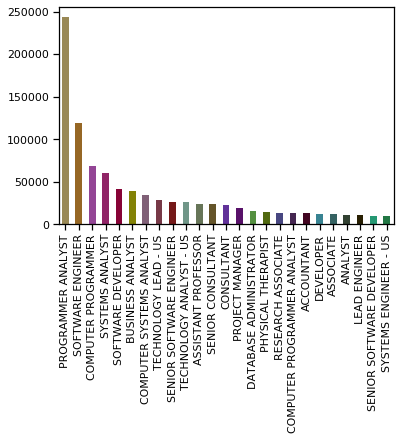

In [333]:
top_job_titles.plot(kind='bar',color=[ '#'+str(int(i)) for i in np.linspace(998855,227744,25)])

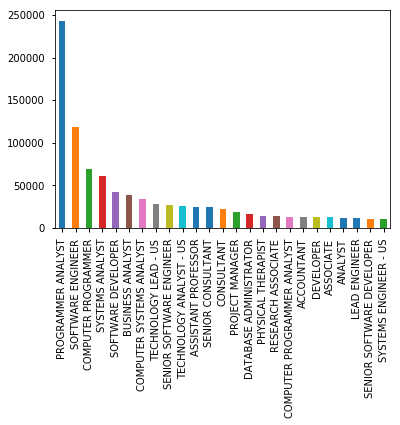

!!! Great Now Make Your Own Questions and Try to Answer Them !!